# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [35]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/user/Downloads/'

### 之前做過的處理

In [10]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [11]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [19]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH'] /365
app_train['YEARS_BIRTH'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
             ..
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: YEARS_BIRTH, Length: 17460, dtype: int64

In [39]:
cut = np.linspace(20, 70, 10)
app_train['YEARS_BIRTH_grp'] = pd.cut(app_train['YEARS_BIRTH'],cut)
app_train['YEARS_BIRTH_grp'].value_counts()

gcut10 = app_train['YEARS_BIRTH_grp'].unique()
gcut10=gcut10.sort_values()
gcut10

[(20.0, 25.556], (25.556, 31.111], (31.111, 36.667], (36.667, 42.222], (42.222, 47.778], (47.778, 53.333], (53.333, 58.889], (58.889, 64.444], (64.444, 70.0]]
Categories (9, interval[float64]): [(20.0, 25.556] < (25.556, 31.111] < (31.111, 36.667] < (36.667, 42.222] ... (47.778, 53.333] < (53.333, 58.889] < (58.889, 64.444] < (64.444, 70.0]]

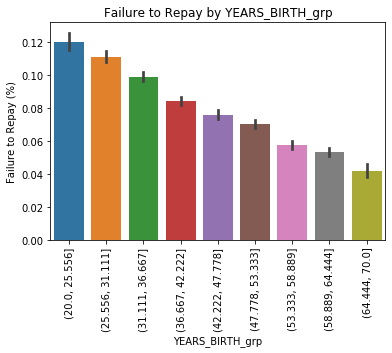

In [42]:
px = 'YEARS_BIRTH_grp'
py = 'TARGET'
sns.barplot(px, py, data = app_train)

# Plot labeling
plt.xticks(rotation = 90); plt.xlabel('YEARS_BIRTH_grp'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by YEARS_BIRTH_grp');